<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

from scipy.stats import bernoulli, beta

In [2]:
# datos
data = pd.read_csv("data/cookie_cats.csv")

In [3]:
# transformacion
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Retention 1

In [4]:
control_1 = data[data.version == "gate_30"].retention_1

In [5]:
test_1 = data[data.version == "gate_40"].retention_1

In [6]:
control_1_true = data[(data.version == "gate_30") & (data.retention_1 == True)]

In [7]:
test_1_true = data[(data.version == "gate_40") & (data.retention_1 == True)]

In [8]:
tasa_control = len(control_1_true)/len(control_1)

In [9]:
tasa_test = len(test_1_true)/len(test_1)

In [10]:
f'TASAS: Control={tasa_control}, Test={tasa_test}'

'TASAS: Control=0.4481879194630872, Test=0.44228274967574577'

In [11]:
beta_control = beta(len(control_1_true) + 1, len(control_1) - len(control_1_true) + 1) #beta(aciertos , total-aciertos)

In [12]:
beta_test = beta(len(test_1_true) + 1, len(test_1) - len(test_1_true) + 1) #distribución beta por eso hay que importar

In [13]:
salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

In [14]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [15]:
x=np.linspace(0.42, 0.48, 1000) #empezar entre 0 y 1 y luego ir ajustando

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

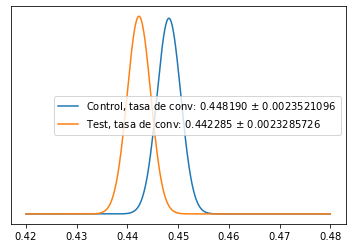

In [16]:
plot([beta_control, beta_test], ["Control", "Test"])

In [17]:
salto=(beta_test.mean() - beta_control.mean())/beta_control.mean()

f"Ha empeorado el test en un {-salto.round(4)*100} por ciento comparado con el grupo control"

'Ha empeorado el test en un 1.32 por ciento comparado con el grupo control'

## Retention 7

In [18]:
control_7 = data[data.version == "gate_30"].retention_7

In [19]:
test_7 = data[data.version == "gate_40"].retention_7

In [20]:
control_7_true = data[(data.version == "gate_30") & (data.retention_7 == True)]

In [21]:
test_7_true = data[(data.version == "gate_40") & (data.retention_7 == True)]

In [22]:
tasa_control_7 = len(control_7_true)/len(control_7)

In [23]:
tasa_test_7 = len(test_7_true)/len(test_7)

In [24]:
f'TASAS: Control={tasa_control_7}, Test={tasa_test_7}'

'TASAS: Control=0.19020134228187918, Test=0.18200004396667327'

In [25]:
beta_control_7 = beta(len(control_7_true) + 1, len(control_7) - len(control_7_true) + 1)

In [26]:
beta_test_7 = beta(len(test_7_true) + 1, len(test_7) - len(test_7_true) + 1)

In [27]:
salto_7=(beta_test_7.mean()-beta_control_7.mean())/beta_control_7.mean()

In [28]:
beta_control_7.mean(), beta_test_7.mean()

(0.19021520289919913, 0.18201402475214878)

In [29]:
x=np.linspace(0.17, 0.205, 1000) #empezar entre 0 y 1 y luego ir ajustando

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

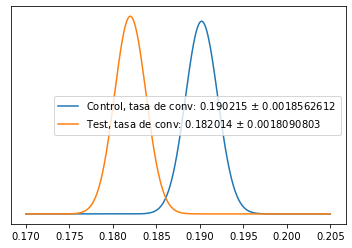

In [30]:
plot([beta_control_7, beta_test_7], ["Control", "Test"])

In [31]:
salto_7=(beta_test_7.mean() - beta_control_7.mean())/beta_control_7.mean()

f"Ha empeorado el test en un {-salto_7.round(4)*100} por ciento comparado con el grupo control"

'Ha empeorado el test en un 4.31 por ciento comparado con el grupo control'

## Frequentistas

### retention 1 day

In [45]:
len(control_1_true)

20034

In [46]:
len(test_1_true)

20119

In [44]:
proportions_ztest([len(control_1_true), len(test_1_true)], nobs=44700, alternative='two-sided')

(-0.5715296896855967, 0.5676406407519317)

In [38]:
test_1_alt

2         True
3        False
4         True
5         True
7        False
         ...  
88602     True
88605    False
88609    False
88611    False
88613    False
Name: retention_1, Length: 44700, dtype: bool